<a href="https://colab.research.google.com/github/miguel-mb-cell/Metricas-ML/blob/main/C%C3%A1lculo_de_M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard('log', histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.8899 - loss: 0.3537 - val_accuracy: 0.9826 - val_loss: 0.0521
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - accuracy: 0.9843 - loss: 0.0485 - val_accuracy: 0.9876 - val_loss: 0.0377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9911 - val_loss: 0.0296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9893 - val_loss: 0.0335
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9928 - loss: 0.0202 - val_accuracy: 0.9903 - val_loss: 0.0311


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


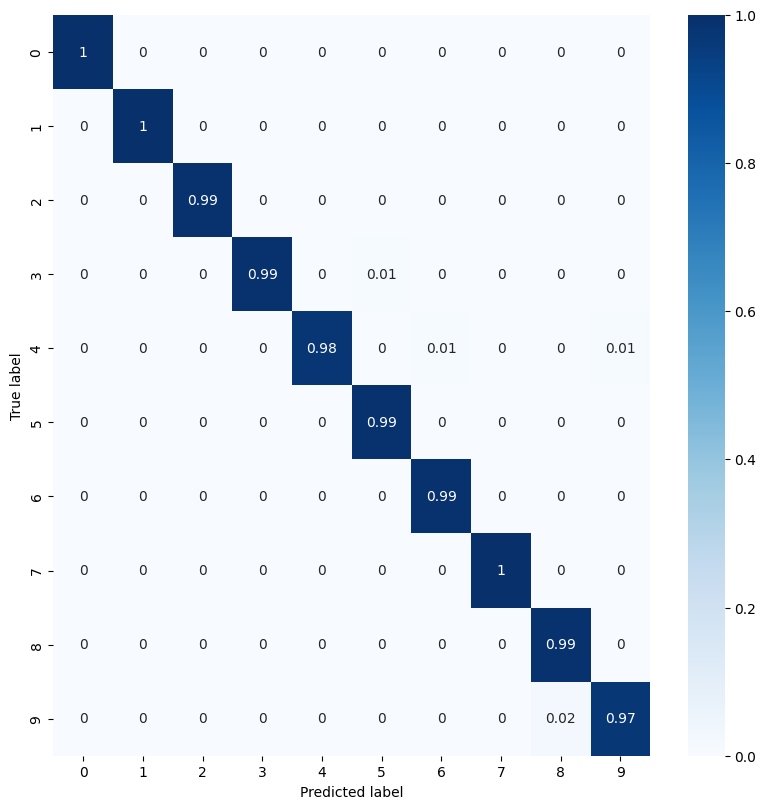

In [ ]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)

con_mat = tf.math.confusion_matrix(labels=y_true,predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Nessa matriz gerada, podemos ver quais foram as previsões do modelo para cada classe.

Vemos que nas classes 0, 1, 7 o modelo teve apenas **Verdadeiros Positivos**, ou seja, acertou todas as previsões para essas classes. Dessa forma, suas métricas serão 100% para todos os casos, já que não houve erros.

Nas classes 2, 3, 5, 6 e 8, o modelo previu corretamente 99% dos casos. Vamos calcular as métricas do modelo para essas classes.

# Sensibilidade
Mede a capacidade do modelo de identificar corretamente as amostras positivas para cada classe.<br><br>
Fórmula: $\frac{VP}{VP+FN}$<br><br>
Aqui está a sensibilidade do modelo para cada classe:
<br><br>
<h3>Classe 0: $\frac{1.00}{1.00+0}=1.00$ </h3>
<br>
<h3>Classe 1: $\frac{1.00}{1.00+0}=1.00$</h3>
<br>
<h3>Classe 2: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 3: $\frac{0.99}{0.99+0.01}=0.99$</h3>
<br>
<h3>Classe 4: $\frac{0.98}{0.98+0.02}=0.98$</h3>
<br>
<h3>Classe 5: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 6: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 7: $\frac{1.00}{1.00+0}=1.00$</h3>
<br>
<h3>Classe 8: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 9:$\frac{0.97}{0.97+0.02}=0.98$</h3>

# Especifidade
Mede a capacidede do modelo de identificar corretamente as amostras negativas para cada classe.<br><br>
Fórmula: $\frac{VN}{FP+VN}$<br><br>
Para o modelo, o cálculo fica:
<br><br>
<h3>Classe 0: $\frac{8.93}{8.93+0.07}=0.9922$</h3>
<br>
<h3>Classe 1: $\frac{8.93}{8.93+0.07}=0.9922$</h3>
<br>
<h3>Classe 2: $\frac{8.94}{8.94+0.06}=0.9933$</h3>
<br>
<h3>Classe 3: $\frac{8.93}{8.93+0.07}=0.9922$</h3>
<br>
<h3>Classe 4: $\frac{8.91}{8.91+0.09}=0.9900$</h3>
<br>
<h3>Classe 5: $\frac{8.93}{8.93+0.07}=0.9922$</h3>
<br>
<h3>Classe 6: $\frac{8.94}{8.94+0.06}=0.9933$</h3>
<br>
<h3>Classe 7: $\frac{8.93}{8.93+0.07}=0.9922$</h3>
<br>
<h3>Classe 8: $\frac{8.93}{8.93+0.07}=0.9922$</h3>
<br>
<h3>Classe 9: $\frac{8.89}{8.89+0.11}=0.9878$</h3>

# Acurácia:
É a proporção de verdadeiros positivos e verdadeiros negativos em relação ao total de amostras. Mede a precisão geral do modelo.<br><br>
Fórmula: $\frac{∑VPs+∑VNs}{N}$<br><br>
Dessa forma, a acurácia do modelo é:
<br><br>
<h3>$\frac{9.82}{10}=0.982$</h3>

# Precisão
Mede a capacidade do modelo de identificar corretamente as amostras negativas para cada classe.<br><br>
Fórmula: $\frac{VP}{VP+FP}$<br><br>
A precisão para cada classe do modelo é:
<br><br>
<h3>Classe 0: $\frac{1.00}{1.00+0}=1.00$</h3>
<br>
<h3>Classe 1: $\frac{1.00}{1.00+0}=1.00$</h3>
<br>
<h3>Classe 2: $\frac{0.99}{0.99+0.01}=0.99$</h3>
<br>
<h3>Classe 3: $\frac{0.99}{0.99+0.01}=0.99$</h3>
<br>
<h3>Classe 4: $\frac{0.98}{0.98+0.02}=0.98$</h3>
<br>
<h3>Classe 5: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 6: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 7: $\frac{1.00}{1.00+0}=1.00$</h3>
<br>
<h3>Classe 8: $\frac{0.99}{0.99+0}=1.00$</h3>
<br>
<h3>Classe 9:$\frac{0.97}{0.97+0.02}=0.98$</h3>

# F-score
É a média harmônica da precisão e da sensibilidade.<br><br>
Fórmula: <h3>$\frac{2×(PrecisãoxSensibilidade}{Precisão+Sensibilidade}$</h3><br>
Para cada classe, essa média fica:
<br><br>
<h3>Classe 0: $\frac{2 × 1.00 × 1.00}{1.00 + 1.00}=1.00$</h3>
<br>
<h3>Classe 1: $\frac{2 × 1.00 × 1.00}{1.00 + 1.00}=1.00$</h3>
<br>
<h3>Classe 2: $\frac{2 × 0.99 × 1.00}{0.99 + 1.00}=0.99$</h3>
<br>
<h3>Classe 3: $\frac{2 × 0.99 × 0.99}{0.99 + 0.99}=0.99$</h3>
<br>
<h3>Classe 4: $\frac{2 × 0.98 × 0.98}{0.98 + 0.98}=0.98$</h3>
<br>
<h3>Classe 5: $\frac{2 × 1.00 × 1.00}{1.00 + 1.00}=1.00$</h3>
<br>
<h3>Classe 6: $\frac{2 × 1.00 × 1.00}{1.00 + 1.00}=1.00$</h3>
<br>
<h3>Classe 7: $\frac{2 × 1.00 × 1.00}{1.00 + 1.00}=1.00$</h3>
<br>
<h3>Classe 8: $\frac{2 × 1.00 × 0.99}{1.00 + 0.99}=0.995$</h3>
<br>
<h3>Classe 9: $\frac{2 × 0.98 × 0.97}{0.98 + 0.97}=0.975$</h3>



# Conclusão

<table>
  <thead>
    <tr>
      <th><h2>Classe</h2></th>
      <th><h2>Sensibilidade</h2></th>
      <th><h2>Especificidade</h2></th>
      <th><h2>Acurácia</h2></th>
      <th><h2>Precisão</h2></th>
      <th><h2>F-score</h2></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><h3>0</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9922</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>1.00</h3></td>
    </tr>
    <tr>
      <td><h3>1</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9922</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>1.00</h3></td>
    </tr>
    <tr>
      <td><h3>2</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9933</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>0.99</h3></td>
      <td><h3>0.99</h3></td>
    </tr>
    <tr>
      <td><h3>3</h3></td>
      <td><h3>0.99</h3></td>
      <td><h3>0.9922</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>0.99</h3></td>
      <td><h3>0.99</h3></td>
    </tr>
    <tr>
      <td><h3>4</h3></td>
      <td><h3>0.98</h3></td>
      <td><h3>0.9900</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>0.98</h3></td>
      <td><h3>0.98</h3></td>
    </tr>
    <tr>
      <td><h3>5</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9922</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>1.00</h3></td>
    </tr>
    <tr>
      <td><h3>6</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9933</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>1.00</h3></td>
    </tr>
    <tr>
      <td><h3>7</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9922</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>1.00</h3></td>
    </tr>
    <tr>
      <td><h3>8</h3></td>
      <td><h3>1.00</h3></td>
      <td><h3>0.9922</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>0.99</h3></td>
      <td><h3>0.995</h3></td>
    </tr>
    <tr>
      <td><h3>9</h3></td>
      <td><h3>0.98</h3></td>
      <td><h3>0.9878</h3></td>
      <td><h3>0.982</h3></td>
      <td><h3>0.98</h3></td>
      <td><h3>0.975</h3></td>
    </tr>
  </tbody>
</table>

